# Time Data Manipulation

In this notebook we practice basic time series manipulation, and recreate a New York Times visualization using COVID-19 data. 

In the cell below import pandas and matplotlib using the standard aliases.

In [ ]:
# Your code here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In the cell below, we import the New York Times COVID-19 State data. 

In [2]:
# Run this cell unchanged
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df.head(2)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0


Let's filter down to the observations for Alabama. 

In the cell below, create a dataframe called `alabama` that contains all of the observations for the state of Alabama.

In [ ]:
# Your code here

In [3]:
alabama = df.query('state=="Alabama"')
alabama.head()

,date,state,fips,cases,deaths
586,2020-03-13,Alabama,1,6,0
637,2020-03-14,Alabama,1,12,0
689,2020-03-15,Alabama,1,23,0
742,2020-03-16,Alabama,1,29,0
795,2020-03-17,Alabama,1,39,0


In the cell below, output the datatypes for each of our columns.

In [ ]:
# Your code here

In [4]:
alabama.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

So we can use some handy time series tools, we need to change the datatype of the `date` column to `datetime`. In the cell below, convert the column to datetime. 

In [ ]:
# Your code here

In [5]:
alabama.date = pd.to_datetime(alabama.date, format='%Y-%m-%d')

/Users/joel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Now, let's set the `date` column as the index of the dataframe.

In [ ]:
# Your code here

In [6]:
alabama = alabama.set_index('date')

The **timesteps** in this dataset are at a **daily frequency**. 

In the cell below, plot the number of cases per day in alabama where the xaxis is the date, and the y axis is the number of cases.

In [ ]:
# Your code here

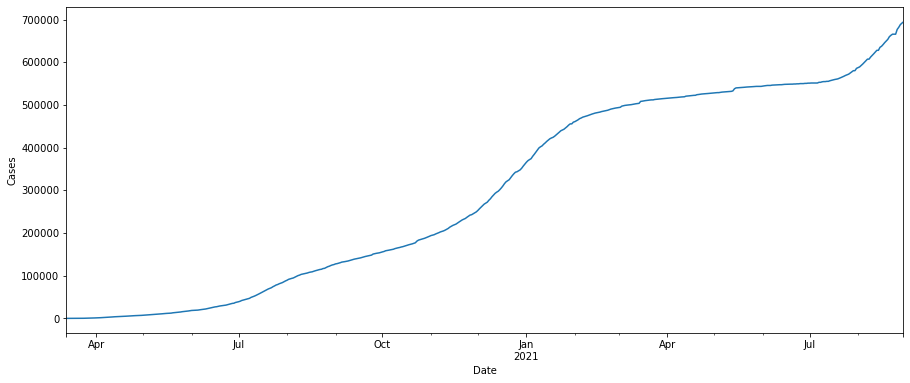

In [7]:
alabama.cases.plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Cases');

Looking at the plot above, we can see that the number of cases increases with each timestep. While not totally uninformative, the takeaway from the plot above is sort of obvious: 
> The total number of documented covid cases increases as time goes by.  

The reason why we are visualizing the total number of *recorded* covid cases is because these data for cases are **cumulative** which means for a given time step **i**:

$t_i$ 

The number of cases for $t_i$ can be written as... 

$The\space number\space of\space new\space cases\space t_i + all\space recorded\space cases\space prior\space to\space t_i$

So if we wanted to find the number of new cases for the most recent day, let's call this day $t_n$ where `n` represents the maximum number of days for which we have data,  all recorded cases prior to the $n_{th}$ day can be written as:

$All\space Recorded\space Cases\space Prior\space to\space the\space n_{th}\space day = \sum_{i=0}^{i=n-1} new\_cases_i$

Where `n` represents the total number of days, and `i` represents an individual day.

The above equation represents the case count for the previous timestep $n-1$:

$t_{n-1} = \sum_{i=t0}^{i=n-1} new\_cases_i$

Having established that the number of cases for a previous day are just the sum of all new cases up to the previous day, and that the number of cases for a new day is simply the number of cases for the previous day + the number of new cases for the new day, we can represent the data for the most recent day as:


$t_{n} = new\_cases_n + t_{n-1} = new\_cases_n + \sum_{i=0}^{i=n-1} new\_cases_i $

And to find the number of new cases that occured on the most recent day, we can simply subtract the previous day from the current day to get the number of new cases reported for the current day. 

In [8]:
# Run this cell unchanged
# Collect the data for the two most 
# recent days
most_recent_data = alabama.iloc[-1]
second_most_recent_data = alabama.iloc[-2]

# Collect dates
most_recent_day = most_recent_data.name.strftime('%m/%d/%Y')
second_most_recent_day = second_most_recent_data .name.strftime('%m/%d/%Y')

# Collect number of cases
most_recent_cases = most_recent_data.cases
second_most_recent_cases = second_most_recent_data.cases

# Find difference between observations
newly_reported_cases = most_recent_cases - second_most_recent_cases

# Print the results
print('===========================')
print('|     DATE    |   CASES   |')
print('===========================')
print(f'| {most_recent_day}  |   {most_recent_cases}  |')
print('---------------------------')
print(f'| {second_most_recent_day}  |   {second_most_recent_cases}  |')
print('---------------------------')
print(f'| NEW CASES:  |     {newly_reported_cases}  |')
print('---------------------------')

|     DATE    |   CASES   |
| 08/30/2021  |   694523  |
---------------------------
| 08/29/2021  |   691451  |
---------------------------
| NEW CASES:  |     3072  |
---------------------------


The data manipulation demonstrated above is called `differencing` and while it is basically just simple subtraction, it is a meaningful deviation from what we have done so far in terms of data manipulation and data modeling.

So far with machine learning, we have always built models with the assumption that every single row is *independent* of each other. By differencing we are now saying that the change from one row to the next contains meaningful information. In other words, we are now saying that the rows are *dependent* on each other. 

-----------

To get the new cases for every day in our data, we can use the pandas `.diff` method, that will subtract each row from a row that came before it.

In the cell below, create a new column in the `alabama` dataframe called `new_cases` that measures the number of newly reported cases for each day. 

In [ ]:
# Your code here

In [9]:
alabama['new_cases'] = alabama['cases'].diff()

When we difference a dataframe, we will always lose some observations in our dataset. In this case, we lose the very first row of data because there is no case count before that row, which means we are unable to say how many new cases occured on that day.

In the cell below, drop this row from the dataset.

In [10]:
# Your code here

In [11]:
alabama = alabama.dropna()

Now that we have a column showing the number of new cases for each day, we can use that column to visualize the change in reported-infection rates, a metric that is much more informative of a pandemic.

In the cell below, plot the `new_cases` column with `date` as the x axis.

In [12]:
# Your code here

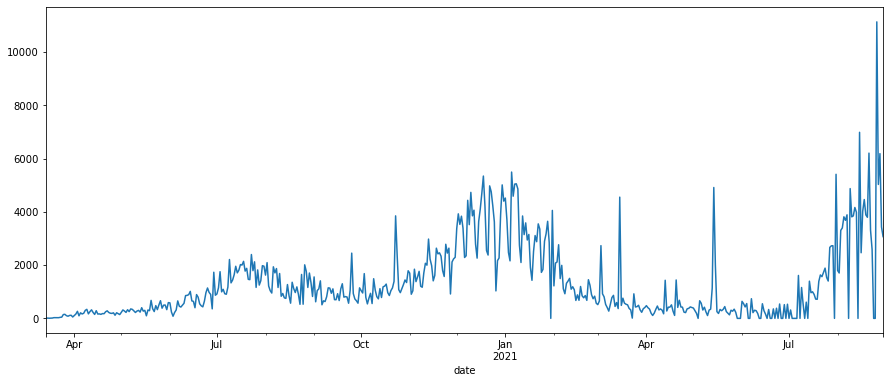

In [13]:
alabama.new_cases.plot(figsize=(15,6));

This is beginning to look a lot more like the visualizations we see in the news!

![](alabama-covid-cases-july-29.png)

If we look at the visualization created by The New York Times above, we can see the words "7-day average". Let's see if we can recreate this plot.

In the cell below, use the pandas `.resample` method for downsampling from daily to weekly timesteps and calculate the weekly average. Add the weekly average data to the alabama dataframe, and name the column `weekly_average`.

In [14]:
# Your code here

In [15]:
alabama['weekly_average'] = alabama.new_cases.resample('W').mean()

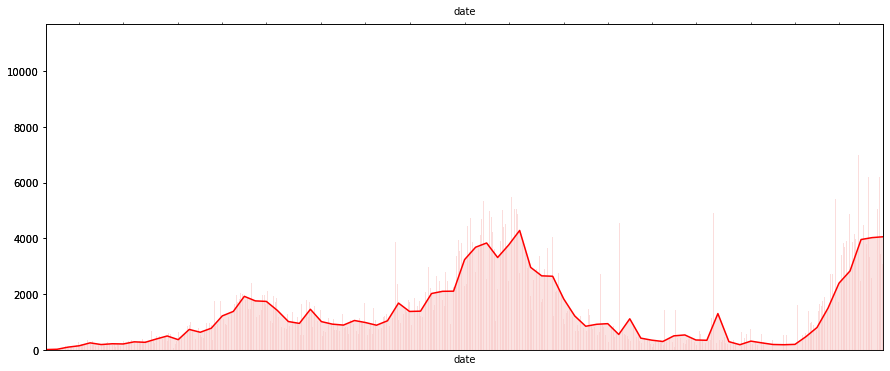

In [16]:
# Run this cell unchanged

# Create a matplotlib subplot
fig, ax = plt.subplots(figsize=(15,6))
# Plot the number of new cases as a bard graph
ax = alabama.new_cases.plot(kind='bar', stacked=True,ax=ax, color='#fbdddc');
# Create a copy of the original axis object
ax2 = ax.twiny()
# Plot the weekly average on the copied axis
alabama.dropna()['weekly_average'].plot(stacked=True,ax=ax2, color='red')
# Collect the x and y axis data for the weekly average
x = ax2.lines[0].get_xdata()
y = ax2.lines[0].get_ydata()
# Fill in the area under the lineplot
ax2.fill_between(x, y,interpolate=True, color='#f8c8c7', alpha=.5)
# Remove the xticks
ax.set_xticks([])
ax2.set_xticks([]);

This looks much closer! If we compare this visualization to the one above, we can see that the weekly average line plot is a little less specific than the one made by the New York Times. This is because the nytimes visualization is made with the **rolling mean** rather than the weekly mean. The weekly mean is simply grouping all of the observations into groups and calculating the average for each group. The rolling mean, however, calculates the mean by looking at the 7 days proceeding each observation and calculating the mean of those seven days. 

In the cell below, calculate the 7 day rolling mean for the `new_cases` column using the `.rolling` method and add overwrite the `weekly_average` column to the alabama dataframe.

In [17]:
# Your code here

In [18]:
alabama['weekly_average'] = alabama.new_cases.rolling(7).mean()

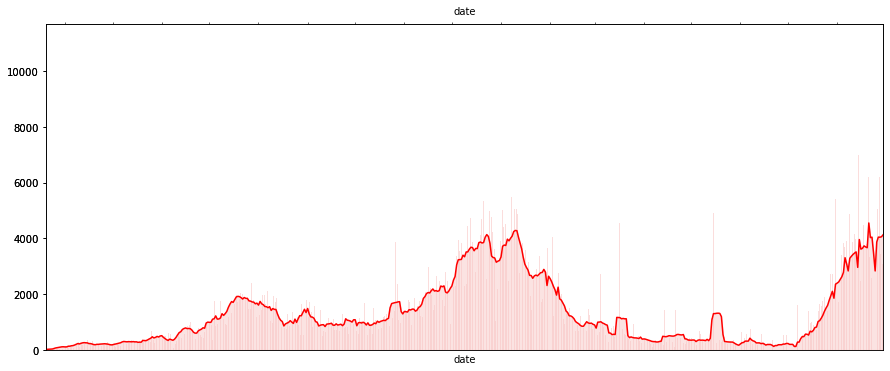

In [19]:
# Run this cell unchanged

fig, ax = plt.subplots(figsize=(15,6))
ax = alabama.new_cases.plot(kind='bar', stacked=True,ax=ax, color='#fbdddc');
ax3 = ax.twiny()
alabama.dropna()['weekly_average'].plot(stacked=True,ax=ax3, color='red')
x = ax3.lines[0].get_xdata()
y = ax3.lines[0].get_ydata()
ax3.fill_between(x, y,interpolate=True, color='#f8c8c7', alpha=.5)
ax.set_xticks([])
ax3.set_xticks([]);

Looking at the rolling average above, is this time series stationary? Why or why not?

YOUR ANSWER HERE

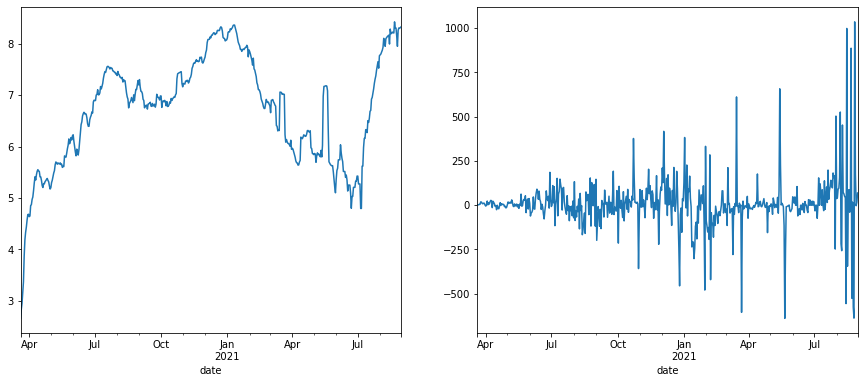

In [22]:
# Run this cell unchanged
import numpy as np
fig, ax = plt.subplots(1,2, figsize=(15,6))

np.log(alabama.dropna().weekly_average).plot(ax=ax[0])
alabama.dropna().weekly_average.diff(1).plot(ax=ax[1]);

Looking at the above visualizations which visualization would you say is more stationary?

YOUR ANSWER HERE

Let's use a statistical test to help confirm whether or not a 1 lagged (or one differenced) moving average is stationary. 


In the cell below, import the [Dickey-Fuller Test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) from statsmodels ([Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)) and run the test. 

How do we interpret this test? What does this tell us about the the weekly average when we difference it by 1?

In [ ]:
# Your code here

In [23]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(alabama.dropna().weekly_average.diff(1).dropna())

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

print ('  Results of Dickey-Fuller Test:')
print('=================================')
pd.DataFrame(dfoutput).rename(columns={0:'Results'})

ModuleNotFoundError: No module named 'statsmodels'

## Bonus

Below we demonstrate how to run differencing and how to calculate moving averages grouped by some category.

It's not uncommon to have a dataset full of multiple time series. In this case, we have a time series for each individual state. At first glance plotting the differenced cases column or the moving average for each state sounds like an annoying subplots situation. But Pandas makes this very simple with their `subplots=True`. 

In [24]:
# Sort the observations by date
# Group by state and isolate the cases column
# Calculate the difference of the cases column while grouped by state
df['new_cases'] = df.sort_values(by='date')\
.groupby(['state'])['cases']\
.diff() 
df = df.dropna()

/Users/joel/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


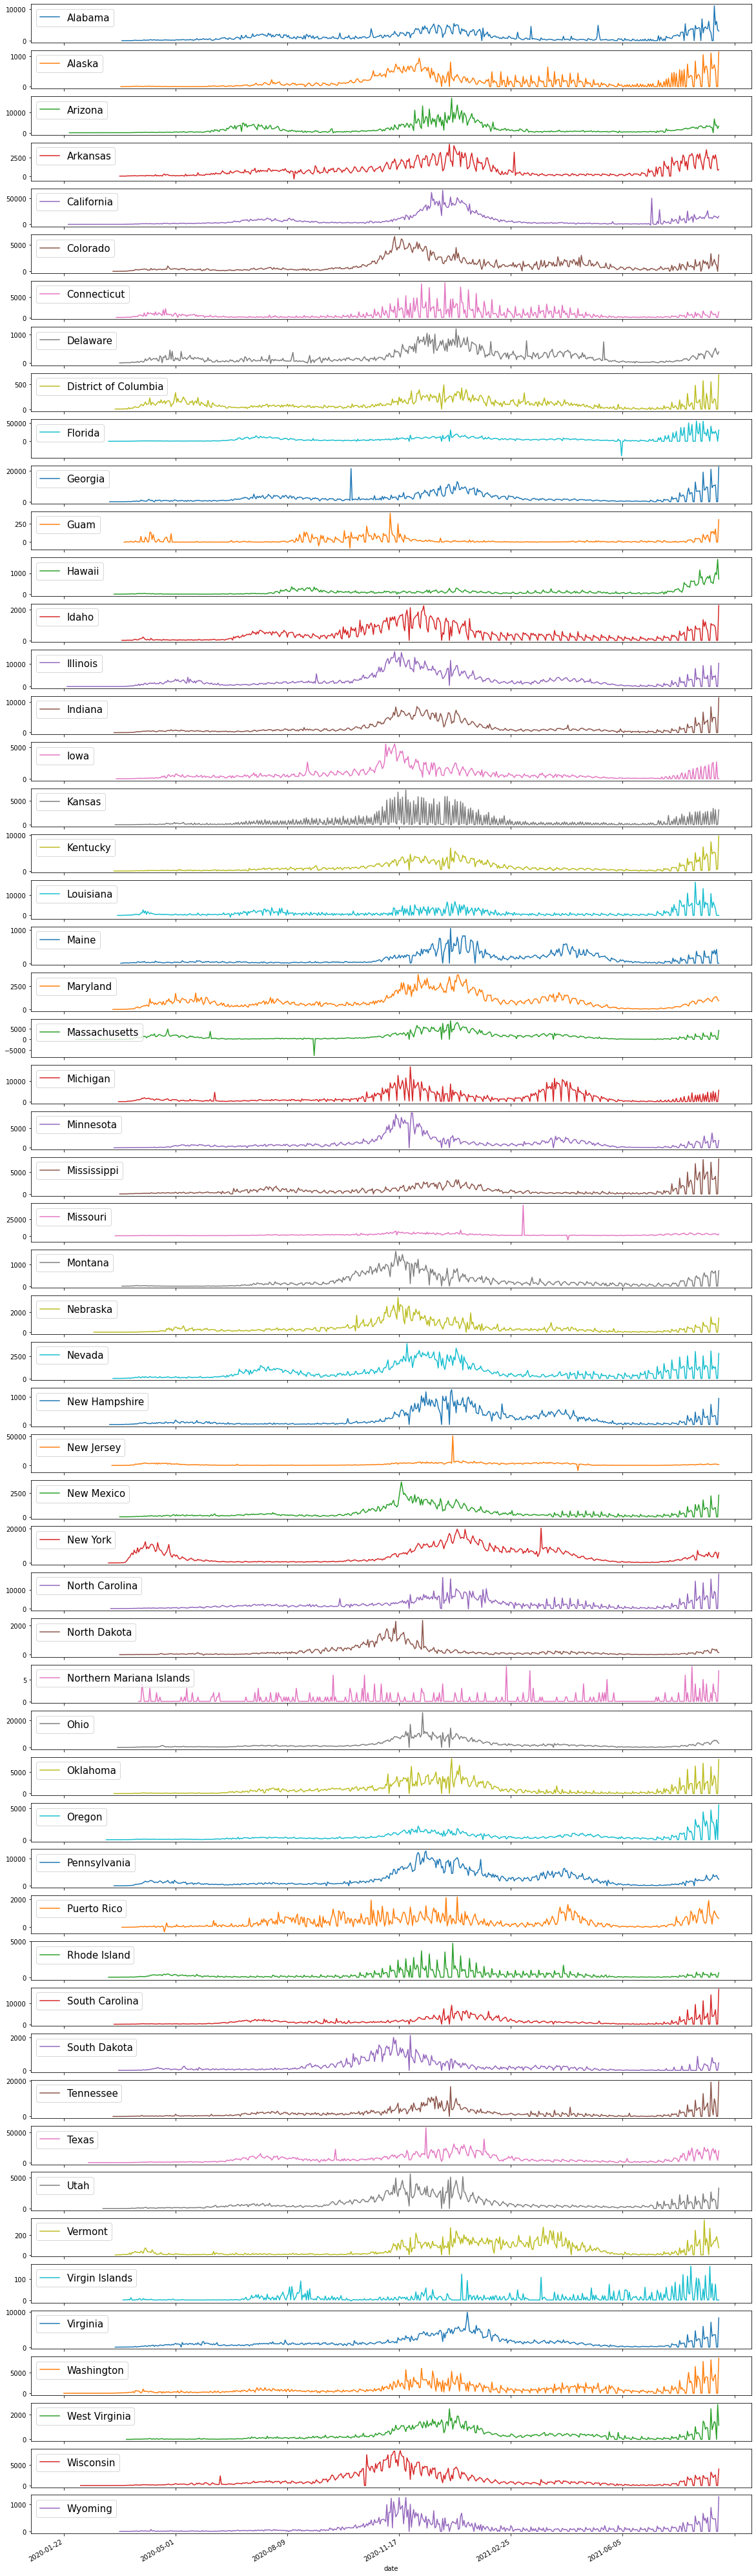

In [25]:
import matplotlib.pyplot as plt

# Create a pivot the the data
# Where the dates are set as the index
# the states each have their own column
# and the values are the new cases
axes = df.reset_index()\
.pivot(index='date', 
columns='state', 
values='new_cases'
).plot(
      subplots=True,      # Set subplots to True
      figsize=(20,80));   # subplots will then create a subplot for each column!

# This loop isn't really required
# I'm just increasing the font size for the legends
states = df.state.unique()
for idx in range(len(states)):
    axes[idx].legend(fontsize=15, loc='upper left')

Now we do a very similar process for the rolling average, but this time we use the transform method to apply a transformation to each time series grouped by state.

In [26]:
df['rolling_average'] = df\
.sort_values('date')\
.groupby(['state'])\
.new_cases.transform(lambda s: s.rolling(7).mean())

rolling_mean = df.dropna()

Then we repeat the process of pivoting the dataframe so the index is the date, each state has its own column and the values in each column is the rolling average.

/Users/joel/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


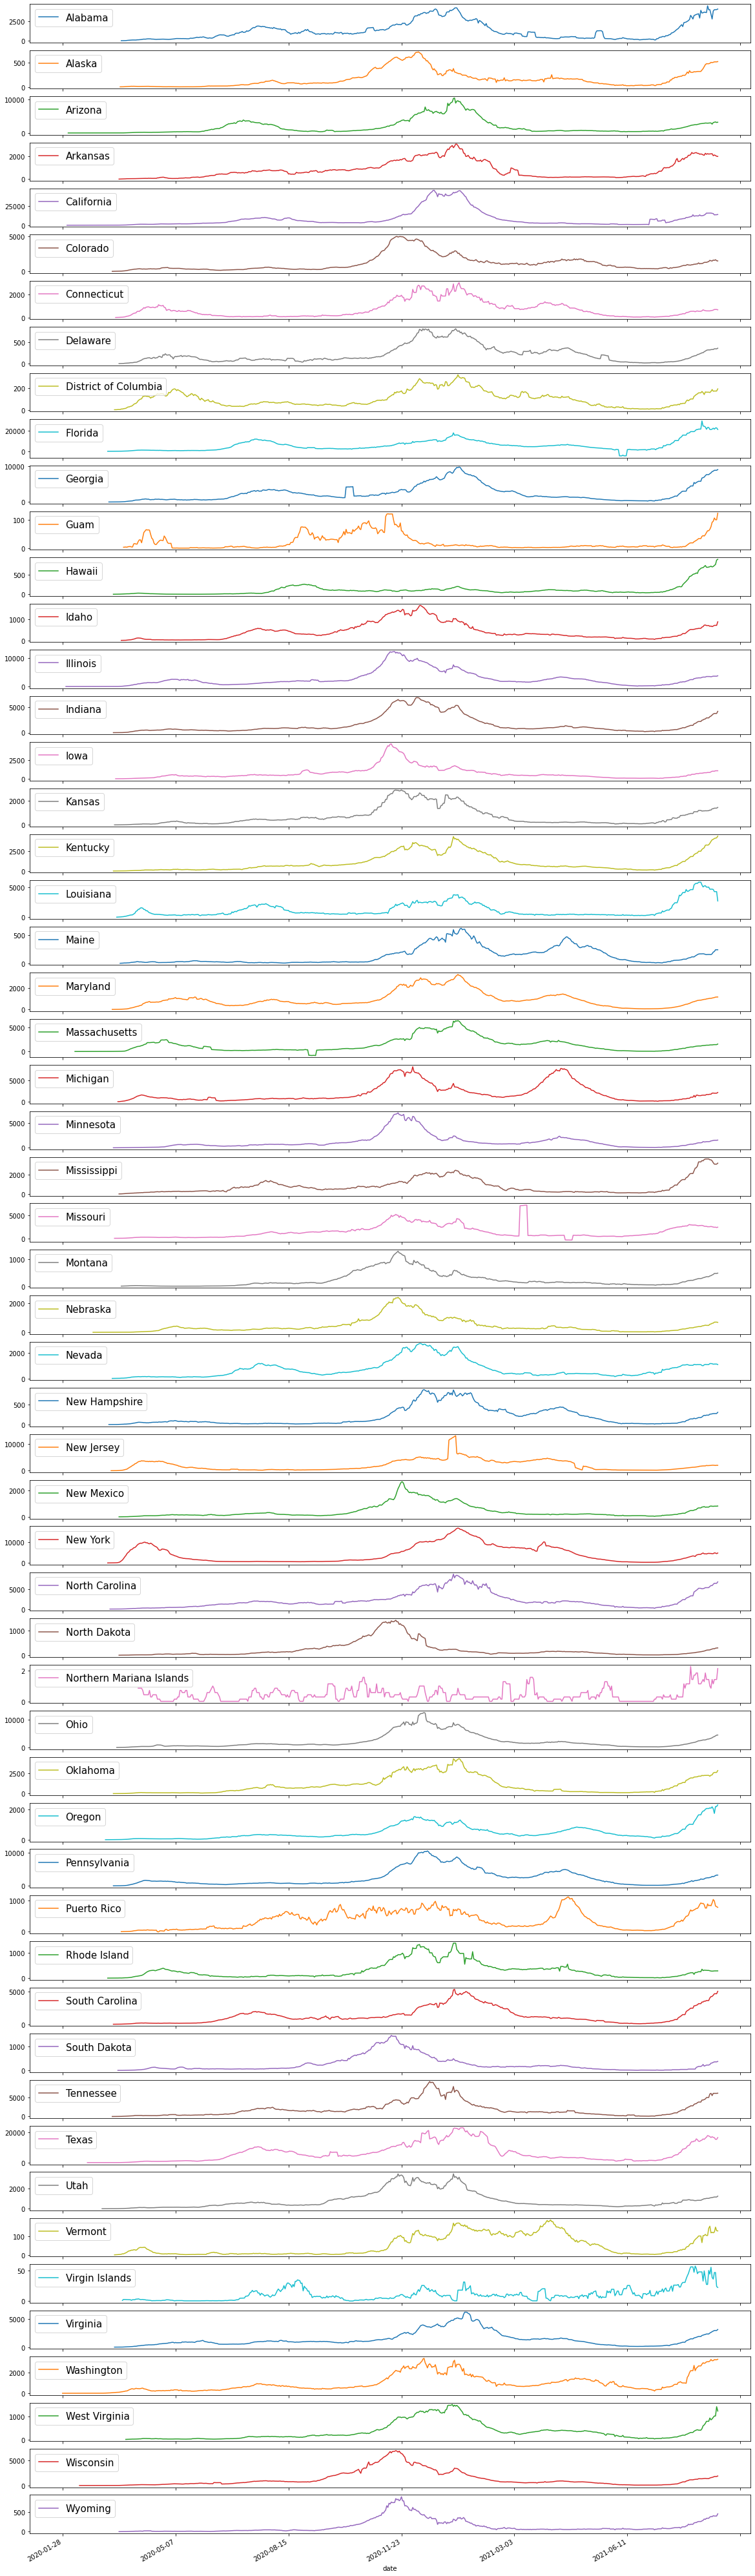

In [27]:
axes = rolling_mean.pivot(index='date', 
                 columns='state', 
                 values='rolling_average'
                ).plot(
                    subplots=True,
                    figsize=(20,80));

for idx in range(len(states)):
    axes[idx].legend(fontsize=15, loc='upper left')